# <span style="color:blue; font-size: 28px;">IT Skills and Salary Trends in India: A Comprehensive Analysis.</span>

In the dynamic landscape of the Indian IT sector, navigating the ever-evolving demand for specific skills within the industry is a formidable challenge, especially for newcomers seeking to carve their niche. Recognizing this, my project, `"IT Skills and Salary Trends in India: A Comprehensive Analysis,"` delves into the intricate fabric of the IT job market, shedding light on the prevailing trends and intricacies that define the skill requirements for various roles. The IT sector's rapid evolution often leaves aspiring professionals grappling with uncertainty about the skills crucial for success in specific job roles. This project serves as a compass, guiding individuals through the complex maze of `IT skills, salary trends, and industry dynamics,` offering invaluable insights to empower informed career decisions.

In the pursuit of unraveling the enigma surrounding IT skills and salary trends, I employed diverse analytical methods to extract meaningful patterns from extensive datasets. The project incorporates visually intuitive data visualizations that not only facilitate a deeper understanding of the information but also enhance user interaction. Through meticulously crafted functions, users can seamlessly navigate the wealth of data, gaining actionable insights into the skills that matter most in the current IT landscape. By combining comprehensive data analysis with user-friendly features, `this project aims to demystify the complexities of the IT job market, providing a valuable resource for both seasoned professionals and newcomers alike."`

### Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
import re
import json
from skimpy import skim

### Importing our Dataset

In [2]:
df = pd.read_csv("Job_Data.csv")
df.head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
0,UPL,10+ yrs,Hyderabad,Software Engineer,3855550.0,C
1,Walmart,10+ yrs,Bengaluru,Software Engineer,4589147.0,Azure
2,SAP India Pvt.Ltd,10+ yrs,Bengaluru,Software Engineer,3439427.0,Azure
3,UPL,10+ yrs,Bengaluru,Data Analyst,3962604.0,Python
4,Walmart,10+ yrs,Bengaluru,Data Analyst,3213431.0,Python


### First of all let's have our salary in whole number.

In [3]:
df['SALARY'] = df['SALARY'].apply(lambda x: round(x, -5))
df.head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
0,UPL,10+ yrs,Hyderabad,Software Engineer,3900000.0,C
1,Walmart,10+ yrs,Bengaluru,Software Engineer,4600000.0,Azure
2,SAP India Pvt.Ltd,10+ yrs,Bengaluru,Software Engineer,3400000.0,Azure
3,UPL,10+ yrs,Bengaluru,Data Analyst,4000000.0,Python
4,Walmart,10+ yrs,Bengaluru,Data Analyst,3200000.0,Python


### Now let's strip any blank spaces in our dataset.

In [4]:
df.columns = df.columns.str.strip()

### Now let's check the size of our dataset and is there is any null values, we will be dropping all the null values.

In [5]:
df.shape

(36504, 6)

In [6]:
df.isnull().sum()

COMPANY       1858
EXPERIENCE    1858
LOCATION      1858
TITLE         1858
SALARY        1858
SKILLS        1858
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

COMPANY       0
EXPERIENCE    0
LOCATION      0
TITLE         0
SALARY        0
SKILLS        0
dtype: int64

In [9]:
df.shape

(34646, 6)

### Instead of utilizing the `Describe` function, I prefer to employ `Skim` which offers a significantly more comprehensive and intelligible dataset summary. Skim not only provides more extensive details but also presents them in a manner that is both user-friendly and efficient.

In [10]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 34646  │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 6      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0     ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ SALARY       │   0 │     0 │  1900000 │  1000000 │ 300000 │ 1000000 │ 2000000 │ 2600000 │ 5000000 │ ▇▅▇▅▁▁ │  │
│ └──────────────┴─────┴───────┴──────────┴──────────┴────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ COMPANY                   │       0 │          0 │                          2.5 │                    88272 │  │
│ │ EXPERIENCE                │       0 │          0 │                          3.8 │                   130084 │  │
│ │ LOCATION                  │       0 │          0 │                            1 │                    34646 │  │
│ │ TITLE                     │       0 │          0 │                          1.9 │                    64612 │  │
│ │ SKILLS                    │       0 │          0 │                            1 │                    34798 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## NOW WE WILL SEE OUR SKILLS COLUMNS



### <span style="color:blue; font-size: 16px;">PLOTTING A WORLD CLOUD TO SEE WHAT ARE THE MOST POPULAR SKILLS .</span>


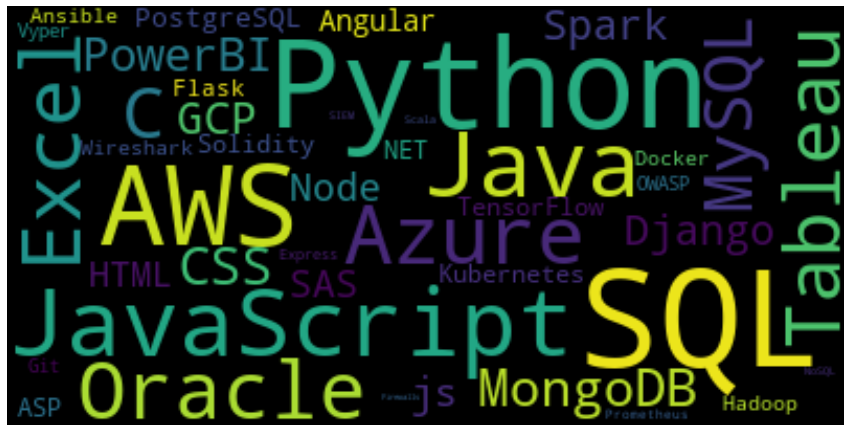

In [11]:
# Concatenate all the skills into a single string
skills_text = ' '.join(df['SKILLS'].astype(str))

# Create a word cloud with collocations disabled
wordcloud = WordCloud(collocations=False).generate(skills_text)

# Set the figure size
plt.figure(figsize=(15, 8))

# Display the word cloud with increased size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
skills_counts = df['SKILLS'].value_counts()

skills_counts

SKILLS
SQL           3825
Python        3100
AWS           2471
JavaScript    2085
Java          1952
R             1697
Excel         1506
Azure         1497
Oracle        1439
Tableau       1332
C             1074
MySQL         1022
MongoDB        948
CSS            948
PowerBI        934
GCP            885
Django         784
Spark          764
SAS            650
Node.js        631
HTML           580
Angular        569
PostgreSQL     459
TensorFlow     415
ASP.NET        385
Solidity       359
Kubernetes     354
Flask          320
Wireshark      244
Hadoop         237
Docker         225
Ansible        221
Git            168
OWASP          152
Vyper          145
Express.js      77
Prometheus      64
Scala           34
SIEM            34
NoSQL           30
Firewalls       21
BigchainDB       9
Name: count, dtype: int64

In [13]:
unique_skills = df['SKILLS'].unique()

# Print the unique skills
for skills in unique_skills:
    print(skills)

C
Azure
Python
SQL
Java
Oracle
Prometheus
Flask
R
Spark
Excel
Node.js
AWS
Tableau
PowerBI
JavaScript
Angular
NoSQL
SAS
MySQL
MongoDB
CSS
Scala
Django
GCP
TensorFlow
OWASP 
BigchainDB
HTML
Vyper
Express.js
Hadoop
Docker
Kubernetes
ASP.NET
PostgreSQL
Solidity
Git
Ansible
Wireshark
Firewalls
SIEM


### <span style="color:blue; font-size: 16px;">PLOTTING A BAR GRAPH TO SEE WHAT ARE THE TOP 10 MOST POPULAR SKILLS .</span>


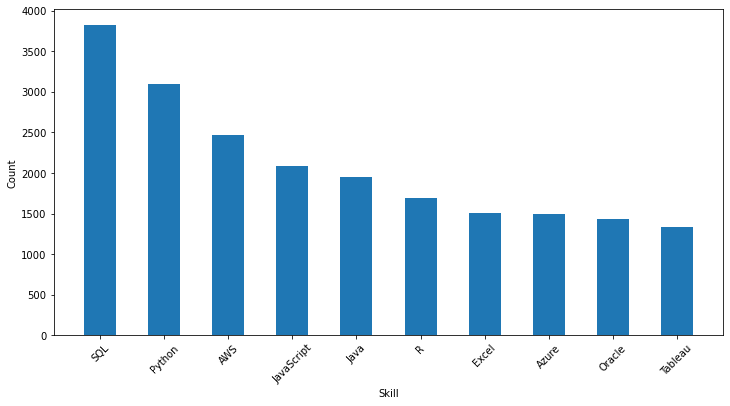

In [14]:
plt.figure(figsize=(12, 6))

# Count the frequency of each skill
skill_counts = df["SKILLS"].value_counts()

# Select the top 10 skills
top_skills = skill_counts.head(10) #just remove head to see all the skills

# Plot the top 10 skills
plt.bar(top_skills.index, top_skills.values, width=0.5)
plt.xlabel("Skill")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

## NOW LET'S SEE OUR LOCATION COLUMN

In [15]:
location_counts = df['LOCATION'].value_counts()

location_counts

LOCATION
Bengaluru    10484
B             5719
Mumbai        4488
Delhi         3575
Hyderabad     3347
             ...  
Sambalpur        2
Tirupati         2
Bhiwadi          2
Cuttack          1
LOCATION         1
Name: count, Length: 88, dtype: int64

In [16]:
unique_locations = df['LOCATION'].unique()

# Print the unique locations
for location in unique_locations:
    print(location)

Hyderabad
Bengaluru
Delhi
Mumbai
Pune
Chennai
Gurgaon
Noida
Faridabad
Kolkata
Thane
Aurangabad
Vadodara
Mysore
Greater
Nagpur
Ahemdabad
Kochi
Varanasi
Vijayawada
Ludhiana
Chandigarh
Ambala
Mathura
Ernakulam
Coimbatore
Panjim
Mangalore
Jodhpur
Hubli
Ghaziabad
Jaipur
Visakhapatnam
Vellore
Guntur
Patna
Nellore
Agartala
Guwahati
Bhubaneshwar
Bangalore
Kolar
Amritsar
Manesar
Bhiwadi
Lucknow
Dehradun
Jamshedpur
Agra
Cuddalore
Indore
Vasai
THANE
PANVEL
Kolhapur
Dimapur
Vikhroli
thane
Kanpur
Hosur
Belgaum
#NAME?
Haridwar
Sambalpur
Tirupati
Bawal
Ahmednagar
Karur
Tuticorin
Jalandhar
Trichy
Cuttack
Chandrapur
Anantapur
PUNE
Rajahmundry
Faizabad
Dahej
Dadra
Moradabad
Mehsana
Silchar
Surat
Itanagar
LOCATION
B
Z
A


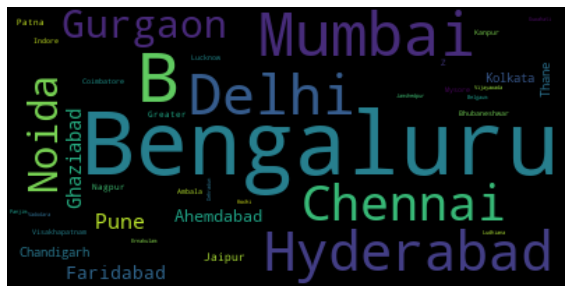

In [17]:
Location_text = ' '.join(df['LOCATION'].astype(str))

# Create a word cloud with collocations disabled
wordcloud = WordCloud(collocations=False).generate(Location_text)

# Set the figure size
plt.figure(figsize=(10, 6))

# Display the word cloud with increased size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### From the 3 outputs displayed above, it is evident that the "Location" column contains numerous unique values, with each location having only 1 job associated with it, which is not accurate neither does it help us with our project.

<br>Therefore, I have decided to remove all the existing data from the "Location" column and manually assign new location values.
<br>Rest assured, the new location I am assigning are not random but have been sourced from the website "https://sarkarijobinsights.com/best-cities-for-it-jobs-in-india/".

In [18]:
df1 = df.copy()  # Create a copy of the original dataframe

# Define the desired values for the LOCATION column
locations = ['Bangalore', 'Hyderabad','Delhi-NCR', 'Pune', 'Mumbai', 'Chennai', 'Chandigarh', 'Ahmedabad', 'Coimbatore', 'Lucknow']

# Define the percentage distribution for each location
percentage_distribution = [21, 18, 15, 13, 12, 8, 6, 3, 2, 1]

# Calculate the number of rows for each location based on the percentage distribution
num_rows = [int(len(df1) * (percentage / 100)) for percentage in percentage_distribution]

# Calculate the remaining rows for distribution
remaining_rows = len(df1) - sum(num_rows)

# Adjust the number of rows for each location to account for remaining rows
num_rows[0] += remaining_rows

# Create a list to store the updated locations
updated_locations = []

# Distribute the locations based on the adjusted number of rows
for index, location in enumerate(locations):
    updated_locations.extend([location] * num_rows[index])
    
# Shuffle the list of locations randomly
np.random.shuffle(updated_locations)

# Update the LOCATION column in the dataframe
df1['LOCATION'] = updated_locations

# NOTE: From now we will use df1

### <span style="color:blue; font-size: 16px;">PLOTTING A WORLD CLOUD TO SEE WHAT ARE THE MOST POPULAR LOCATIONS TO WORK IN .</span>

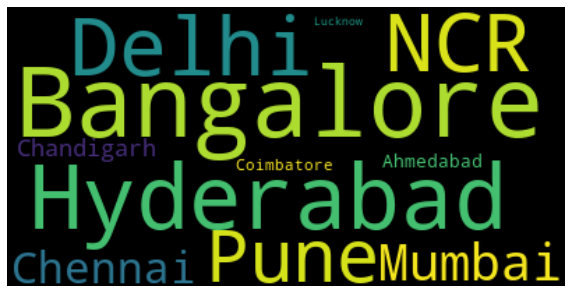

In [19]:
# Concatenate all the skills into a single string
Location_text = ' '.join(df1['LOCATION'].astype(str))

# Create a word cloud with collocations disabled
wordcloud = WordCloud(collocations=False).generate(Location_text)

# Set the figure size
plt.figure(figsize=(10, 6))

# Display the word cloud with increased size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
location_counts = df1['LOCATION'].value_counts()

location_counts

LOCATION
Bangalore     7628
Hyderabad     6236
Delhi-NCR     5196
Pune          4503
Mumbai        4157
Chennai       2771
Chandigarh    2078
Ahmedabad     1039
Coimbatore     692
Lucknow        346
Name: count, dtype: int64

In [21]:
unique_locations = df1['LOCATION'].unique()

# Print the unique locations
for location in unique_locations:
    print(location)

Hyderabad
Delhi-NCR
Mumbai
Pune
Chennai
Ahmedabad
Bangalore
Chandigarh
Coimbatore
Lucknow


### <span style="color:blue; font-size: 16px;">PLOTTING A BAR GRAPH TO SEE WHAT ARE THE MOST POPULAR LOCATIONS TO WORK IN .</span>

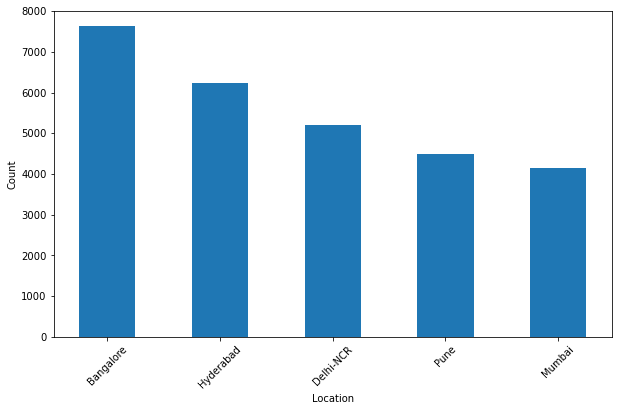

In [22]:
plt.figure(figsize=(10, 6))

# Count the frequency of each location
location_counts = df1["LOCATION"].value_counts()

# Select the top 5 locations
top_locations = location_counts.head(5)

# Plot the top 5 locations
plt.bar(top_locations.index, top_locations.values, width=0.5)
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)


plt.show()

## NOW LET'S CHECK OUR SALARY COLUMN

In [23]:
df1.head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
0,UPL,10+ yrs,Hyderabad,Software Engineer,3900000.0,C
1,Walmart,10+ yrs,Delhi-NCR,Software Engineer,4600000.0,Azure
2,SAP India Pvt.Ltd,10+ yrs,Mumbai,Software Engineer,3400000.0,Azure
3,UPL,10+ yrs,Pune,Data Analyst,4000000.0,Python
4,Walmart,10+ yrs,Delhi-NCR,Data Analyst,3200000.0,Python


In [24]:
df1["SALARY"].max()

5000000.0

In [25]:
df1["SALARY"].min()

300000.0

In [26]:
df1[df1.SALARY<400000].head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
12072,TransOrg Solutions Services (P) Ltd.,0 - 3 yrs,Hyderabad,Consultant,300000.0,R
12077,Applied Materials,0 - 3 yrs,Chennai,Consultant,300000.0,PowerBI
12081,IBM,0 - 3 yrs,Bangalore,Consultant,300000.0,SQL
12087,HUDSON'S BAY SERVICES PRIVATE LIMITED,0 - 3 yrs,Bangalore,Consultant,300000.0,SQL
12093,PayPal,0 - 3 yrs,Chandigarh,Consultant,300000.0,SQL


In [27]:
df1[df1.SALARY==df1.SALARY.min()].head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
12072,TransOrg Solutions Services (P) Ltd.,0 - 3 yrs,Hyderabad,Consultant,300000.0,R
12077,Applied Materials,0 - 3 yrs,Chennai,Consultant,300000.0,PowerBI
12081,IBM,0 - 3 yrs,Bangalore,Consultant,300000.0,SQL
12087,HUDSON'S BAY SERVICES PRIVATE LIMITED,0 - 3 yrs,Bangalore,Consultant,300000.0,SQL
12093,PayPal,0 - 3 yrs,Chandigarh,Consultant,300000.0,SQL


In [28]:
df1[df1.SALARY>4500000].head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
1,Walmart,10+ yrs,Delhi-NCR,Software Engineer,4600000.0,Azure
10,Global Employees,10+ yrs,Chennai,Software Engineer,4900000.0,Java
36,Connexions,10+ yrs,Chandigarh,Software Engineer,4600000.0,Azure
42,IBM,10+ yrs,Chandigarh,Software Engineer,4600000.0,Azure
366,IBM,10+ yrs,Mumbai,Software Engineer,4900000.0,Azure


In [29]:
df1[df1.SALARY==df1.SALARY.max()].head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
376,Thomson Reuters,10+ yrs,Bangalore,Software Engineer,5000000.0,Azure
466,EinNel Technologies,10+ yrs,Ahmedabad,Software Engineer,5000000.0,JavaScript
15559,Infostretch solutions Pvt. Ltd.,10+ yrs,Chennai,Data Engineer,5000000.0,SQL
15612,Infostretch solutions Pvt. Ltd.,10+ yrs,Pune,Data Engineer,5000000.0,SQL
15641,Infostretch solutions Pvt. Ltd.,10+ yrs,Pune,Data Engineer,5000000.0,SAS


In [30]:
df1[["COMPANY","SALARY"]][df1.SALARY==df1['SALARY'].max()].head()

,COMPANY,SALARY
376,Thomson Reuters,5000000.0
466,EinNel Technologies,5000000.0
15559,Infostretch solutions Pvt. Ltd.,5000000.0
15612,Infostretch solutions Pvt. Ltd.,5000000.0
15641,Infostretch solutions Pvt. Ltd.,5000000.0


In [31]:
df1[["TITLE","SALARY"]][df1.SALARY==df1['SALARY'].max()].head()

,TITLE,SALARY
376,Software Engineer,5000000.0
466,Software Engineer,5000000.0
15559,Data Engineer,5000000.0
15612,Data Engineer,5000000.0
15641,Data Engineer,5000000.0


In [32]:
df1[["TITLE","SALARY"]][df1.SALARY==df1['SALARY'].min()].head()

,TITLE,SALARY
12072,Consultant,300000.0
12077,Consultant,300000.0
12081,Consultant,300000.0
12087,Consultant,300000.0
12093,Consultant,300000.0


In [33]:
df1[["COMPANY","SALARY"]][df1.SALARY==df1['SALARY'].min()].head()

,COMPANY,SALARY
12072,TransOrg Solutions Services (P) Ltd.,300000.0
12077,Applied Materials,300000.0
12081,IBM,300000.0
12087,HUDSON'S BAY SERVICES PRIVATE LIMITED,300000.0
12093,PayPal,300000.0


## NOW LET'S SEE OUR `TITLE` COLUMN

Since we have spaces in between the name of the job title word cloud will not be able to effectively show the result. So we will plot a bar graph for easier undertsanding of the most popular job role.

### <span style="color:blue; font-size: 16px;">PLOTTING A BAR GRAPH TO SEE WHICH IS THE MOST POPULAR JOB ROLE.</span>

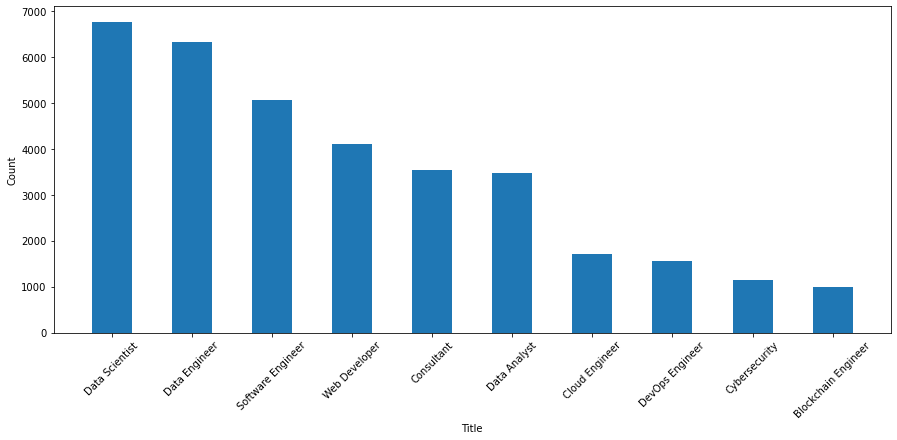

In [34]:
plt.figure(figsize=(15, 6))

# Count the frequency of each location
title_counts = df1["TITLE"].value_counts()

# Select the top 5 locations
top_title = title_counts

# Plot the top 5 locations
plt.bar(top_title.index, top_title.values, width=0.5)
plt.xlabel("Title")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

In [35]:
title_counts = df['TITLE'].value_counts()

title_counts

TITLE
Data Scientist         6761
Data Engineer          6327
Software Engineer      5054
Web Developer          4097
Consultant             3529
Data Analyst           3465
Cloud Engineer         1706
DevOps Engineer        1568
Cybersecurity          1151
Blockchain Engineer     988
Name: count, dtype: int64

In [36]:
unique_titles = df1['TITLE'].unique()

# Print the unique locations
for title in unique_titles:
    print(title)

Software Engineer
Data Analyst
DevOps Engineer
Data Scientist
Consultant
Data Engineer
Cybersecurity
Blockchain Engineer
Web Developer
Cloud Engineer


To date, we have completed cleaning, analyzing, and creating visualizations for each individual column in the dataframe. Moving forward, we will now proceed to analyze two columns simultaneously and develop a set of helpful functions to facilitate a clearer understanding of the data. Our aim is to ensure that these functions are user-friendly, allowing a third party to effortlessly utilize them and obtain the specific information they desire.

## Let's check what are `Skills` required for a specific `Job Title`.<br>
We will make a DataFrame containing job titles and skills, groups the skills by job roles, and creates a new DataFrame that aggregates the unique skills for each job role. The resulting DataFrame provides a consolidated view of job titles and their associated skills.

In [56]:
def job_skills_dataframe(df1):
    
    # Create an empty DataFrame with 'TITLE' and 'SKILLS' columns
    job_skills_df1 = pd.DataFrame(columns=['TITLE', 'SKILLS'])

    # Group the DataFrame by unique job roles in the TITLE column
    grouped = df1.groupby('TITLE')

    # Iterate over each job role group
    for title, group in grouped:
        # Get the unique skills for the current job role group
        unique_skills = group['SKILLS'].unique()

        # Convert float values to strings
        unique_skills = [str(skill) for skill in unique_skills]

        # Join the unique skills into a string separated by commas
        skills_str = ', '.join(unique_skills)

        # Append the job role and associated skills to the DataFrame
        job_skills_df1 = pd.concat([job_skills_df1, pd.DataFrame({'TITLE': [title], 'SKILLS': [skills_str]})],
                                  ignore_index=True)

    return job_skills_df1

# Adjust display options to show all text in columns
pd.set_option('display.max_colwidth', None)

In [57]:
job_skills_dataframe(df1)

,TITLE,SKILLS
0,Blockchain Engineer,"SQL, Oracle, BigchainDB, Vyper, MySQL, Solidity"
1,Cloud Engineer,"Python, Express.js, Azure, Kubernetes, ASP.NET, MongoDB, PostgreSQL, Java, Flask, Docker, SQL, AWS, GCP"
2,Consultant,"R, Python, Excel, AWS, Tableau, Oracle, NoSQL, PowerBI, SQL, Azure, MySQL, MongoDB, TensorFlow, Django, JavaScript, Java"
3,Cybersecurity,"MySQL, OWASP , AWS, C, JavaScript, Wireshark, Firewalls, Azure, SIEM"
4,Data Analyst,"Python, SQL, Excel, R, Oracle, AWS, Azure, PowerBI, SAS, MySQL, MongoDB, Tableau, PostgreSQL, Django"
5,Data Engineer,"SAS, SQL, JavaScript, Python, GCP, Java, Django, R, AWS, Spark, PowerBI, Excel, Tableau, MySQL, Azure, MongoDB, PostgreSQL"
6,Data Scientist,"Flask, Oracle, R, Spark, Tableau, AWS, Python, Excel, PowerBI, Azure, MySQL, SAS, SQL, MongoDB, JavaScript, C, Scala, Java, Django, GCP, TensorFlow, Hadoop"
7,DevOps Engineer,"Oracle, Prometheus, Python, AWS, SQL, Azure, Docker, Kubernetes, Ansible, MongoDB, PostgreSQL"
8,Software Engineer,"C, Azure, Java, Node.js, Oracle, JavaScript, Angular, AWS, CSS, MySQL, SQL, Excel, Python, Tableau, SAS, MongoDB"
9,Web Developer,"HTML, MongoDB, CSS, JavaScript, Java, Angular, MySQL, Node.js, AWS, Azure, GCP, Git, Express.js"


The code appears to be clean and comprehensible at the moment, doesn't it? 

However, we can further enhance its clarity and visual appeal by developing a function that interacts with the DataFrame. This function will allow users to view the skills specific to the job role they desire. Additionally, we can incorporate a graph to provide a more intuitive representation of the skills, making the understanding process even easier.

In [60]:
def plot_skills_for_job_role(df1, job_role):
    
    if job_role.lower() == 'all':
        # Count the occurrence of each skill for all job roles
        skills = df1['SKILLS'].str.split(', ')
        skill_counts = pd.Series([skill for sublist in skills for skill in sublist]).value_counts()

        # Sort the skills based on count in ascending order
        skill_counts = skill_counts.sort_values(ascending=True)

        # Plot the vertical bar graph for all skills
        plt.figure(figsize=(10, 5))  # Adjust the figure size
        plt.barh(skill_counts.index, skill_counts.values)
        plt.ylabel('Skills')
        plt.xlabel('Count')
        plt.title('Skills for All Job Roles')
        plt.show()
    else:
        # Filter the DataFrame for the given job role
        filtered_df = df1[df1['TITLE'] == job_role]

        # Get the skills for the job role
        skills = filtered_df['SKILLS'].str.split(', ')

        # Count the occurrence of each skill
        skill_counts = pd.Series([skill for sublist in skills for skill in sublist], dtype='object').value_counts()

        # Sort the skills based on count in ascending order
        skill_counts = skill_counts.sort_values(ascending=True)

        # Plot the vertical bar graph for the specific job role
        plt.figure(figsize=(10, 5))  # Adjust the figure size
        plt.barh(skill_counts.index, skill_counts.values)
        plt.ylabel('Skills')
        plt.xlabel('Count')
        plt.title(f'Skills for specific Job Role: {job_role}')
        plt.show()

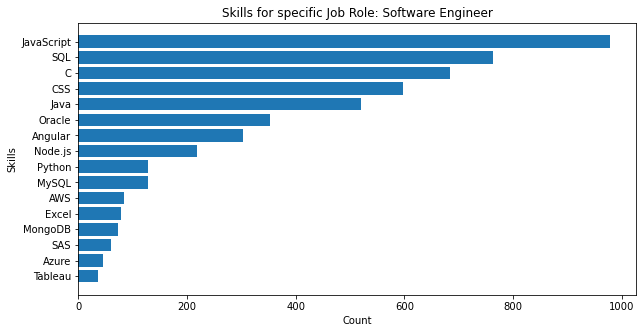

In [61]:
plot_skills_for_job_role(df1, 'Software Engineer')         # Plot for all job roles

## Now, let's categorize our skills

In [41]:
df2 = df1.copy()

def categorize_skills(skill):
    if re.search(r'\b(sql|NoSQL|Scala|python|java|C|javascript|R|css|Solidity|Vyper|HTML|ASP.NET)\b', skill, re.IGNORECASE):
        return 'Languages'
    elif re.search(r'\b(mongodb|Mysql|BigchainDB)\b', skill, re.IGNORECASE):
        return 'Databases'
    elif re.search(r'\b(aws|azure|gcp|oracle|PostgreSQL)\b', skill, re.IGNORECASE):
        return 'Cloud'
    elif re.search(r'\b(django|Node\.js|Angular|Docker|Express.js|Flask|Kubernetes|TensorFlow|OWASP)\b', skill, re.IGNORECASE):
        return 'Frameworks'
    elif re.search(r'\b(PowerBI|Tableau|Excel|Git|Prometheus|SAS|Wireshark|Firewalls|Ansible|SIEM|Spark|Hadoop)\b', skill, re.IGNORECASE):
        return 'Tools'
    else:
        return 'Other'

df2['CATEGORY'] = df2['SKILLS'].apply(categorize_skills)

To ensure the correct distribution of data, I will save this DataFrame to an Excel file and review it there. Excel provides a convenient platform for verifying data distribution, and personally, I find it more convenient to perform such checks using Excel. Although we can do that here also.

In [42]:
df1.head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
0,UPL,10+ yrs,Hyderabad,Software Engineer,3900000.0,C
1,Walmart,10+ yrs,Delhi-NCR,Software Engineer,4600000.0,Azure
2,SAP India Pvt.Ltd,10+ yrs,Mumbai,Software Engineer,3400000.0,Azure
3,UPL,10+ yrs,Pune,Data Analyst,4000000.0,Python
4,Walmart,10+ yrs,Delhi-NCR,Data Analyst,3200000.0,Python


In [43]:
df2.head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS,CATEGORY
0,UPL,10+ yrs,Hyderabad,Software Engineer,3900000.0,C,Languages
1,Walmart,10+ yrs,Delhi-NCR,Software Engineer,4600000.0,Azure,Cloud
2,SAP India Pvt.Ltd,10+ yrs,Mumbai,Software Engineer,3400000.0,Azure,Cloud
3,UPL,10+ yrs,Pune,Data Analyst,4000000.0,Python,Languages
4,Walmart,10+ yrs,Delhi-NCR,Data Analyst,3200000.0,Python,Languages


In [44]:
skills_counts = df2['CATEGORY'].value_counts()

skills_counts

CATEGORY
Languages     16214
Cloud          6751
Tools          6175
Frameworks     3527
Databases      1979
Name: count, dtype: int64

Perfect so far :)

Let's enhance our previous function 'plot_skills_for_job_role' that displayed the top skills for a specific job. This time, we will include an additional parameter, the skill category, allowing us to showcase skills related to that particular category only.

In [45]:
def plot_skills_required(df2):
    try:
        # Ask the user for the specific job role
        job_role = input("Enter the job role (or leave empty for all job roles): ").lower()

        # Ask the user for the specific category
        category = input("Enter the category (or leave empty for all categories): ").lower()

        if job_role and category:
            # Filter the dataframe based on the job role and category
            filtered_df = df2[(df2['TITLE'].str.lower() == job_role) & (df2['CATEGORY'].str.lower() == category)]
            title = f"Skills Required for {job_role} ({category} Category)"
        elif job_role:
            # Filter the dataframe based on the job role
            filtered_df = df2[df2['TITLE'].str.lower() == job_role]
            title = f"Skills Required for {job_role}"
        elif category:
            # Filter the dataframe based on the category
            filtered_df = df2[df2['CATEGORY'].str.lower() == category]
            title = f"Skills Required ({category} Category)"
        else:
            # No specific job role or category selected, plot for all job roles and skills
            filtered_df = df2
            title = "Skills Required for All Job Roles"

        # Count the occurrences of each skill
        skills_counts = filtered_df['SKILLS'].value_counts().sort_values()

        # Plot the skills
        plt.figure(figsize=(20, 6))
        skills_counts.plot(kind='bar')
        plt.xlabel('Skills')
        plt.ylabel('Count')
        plt.title(title)
        plt.xticks(rotation=45)
        plt.show()

    except Exception as e:
        print("Error:", str(e))

Enter the job role (or leave empty for all job roles): 
Enter the category (or leave empty for all categories): 


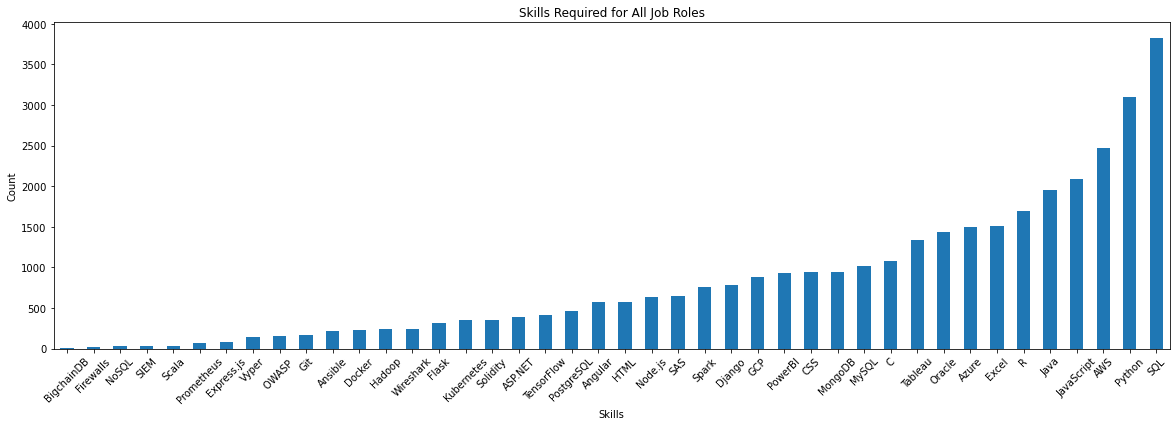

In [46]:
plot_skills_required(df2)

## Now let's see which `JOB ROLE` gives the most `SALARY`.

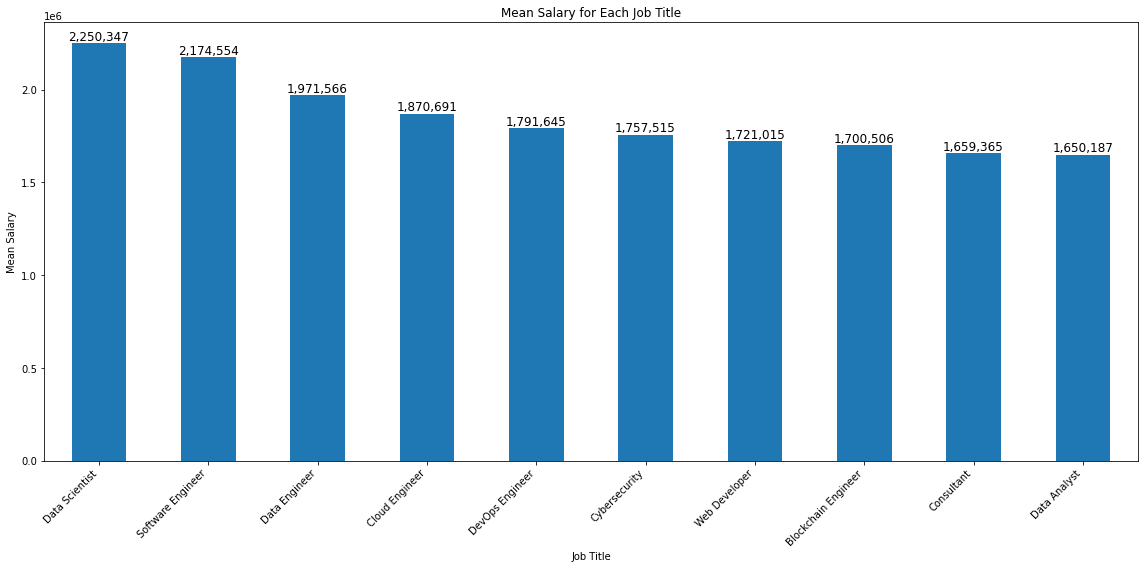

In [47]:
# Step 1: Calculate the mean salary for each job title
mean_salaries = df2.groupby('TITLE')['SALARY'].mean()  # Use the mean() method to calculate the mean.

# Step 2: Sort mean salaries in descending order
mean_salaries = mean_salaries.sort_values(ascending=False)

# Step 3: Plot the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
ax = mean_salaries.plot(kind='bar')

# Add mean values on top of each bar without decimal places
for idx, value in enumerate(mean_salaries):
    ax.text(idx, value, f'{int(value):,}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Mean Salary for Each Job Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From to the graph above, it is evident that Data scientists enjoy the highest average salary. However, it's important to note that the salary figures are provided here are for general reference and do not necessarily indicate the significance of each role. Exceptional skills and substantial experience in any job role can lead to a substantial increase in salary.

## Let's have another handy function which can provide us with the average salary of our desired job title for various experience level. 

Enter the job title: data analyst


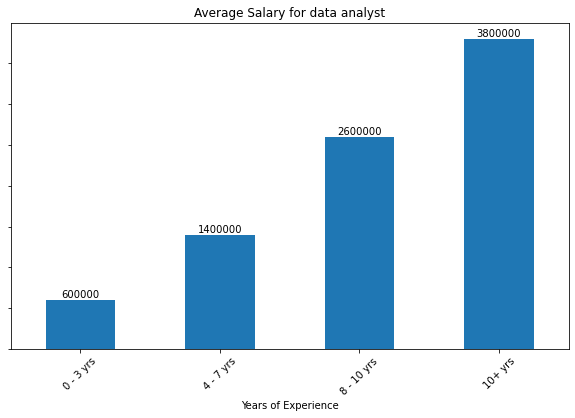

In [48]:
# Ask the user for the job title
user_input = input("Enter the job title: ")

# Convert the user input to lowercase for case-insensitive comparison
job_title = user_input.lower()

# Filter the DataFrame for the given job title (convert job titles in the DataFrame to lowercase for comparison)
filtered_df = df2[df2['TITLE'].str.lower() == job_title]  # Replace 'your_dataset' with your actual DataFrame

# Check if there are matching rows
if not filtered_df.empty:
    # Group the filtered data by 'Experience' and calculate the average salary
    average_salary = filtered_df.groupby('EXPERIENCE')['SALARY'].mean()

    # Sort the data in ascending order
    average_salary = average_salary.sort_values()

    # Round the values to the nearest 100,000 and convert to integers
    rounded_values = (average_salary / 100000).round().astype(int) * 100000

    # Increase the figure size
    plt.figure(figsize=(10, 6))  # You can adjust the size as needed

    # Plot the bar graph
    ax = rounded_values.plot(kind='bar')
    ax.set_xlabel('Years of Experience')
    ax.set_title(f'Average Salary for {user_input}')

    # Rotate the X-axis labels by 180 degrees
    ax.set_xticklabels(average_salary.index, rotation=45)

    # Remove Y-axis labels
    ax.set_yticklabels([])

    # Display the rounded average salary at the top of each bar
    for i, v in enumerate(rounded_values):
        ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

    plt.show()
else:
    print(f"No data found for job title: {user_input}")

### Let's save our final Dataframe in a csv file. 

In [49]:
df2.to_csv('Final_Data.csv', index=False)

# THANK YOU FOR READING 